loading librarys

In [303]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib as plt
from scipy.optimize import curve_fit
from matplotlib import pyplot
from sklearn import model_selection, preprocessing, neighbors,svm
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import r2_score,silhouette_score

loading and converting data

In [304]:
#read txt data
txtdf=pd.read_csv("Infant_Diagnosis.txt",header=None)
txtdf.columns=['season','age','ACCIDENT','diseases','surgical','fevers','alcohol','smoking','sitting','diagnosis']
#convert txt to csv
txtdf.to_csv("Infant_Diagnosis.csv",index=None)
df=pd.read_csv("Infant_Diagnosis.csv")
#convert string dependent variable to bool
df['diagnosis']=df['diagnosis'].replace(['N','O'],[0,1])
df.head(10)

,season,age,ACCIDENT,diseases,surgical,fevers,alcohol,smoking,sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,0
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,0
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,0
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,0


spliting data

In [305]:
x = np.array(df.drop(['diagnosis'],1))
y = np.array(df['diagnosis'])
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2)


<ipython-input-305-eea423060ccc>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['diagnosis'],1))


ploting data


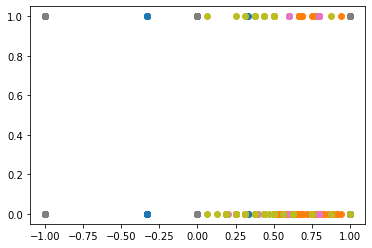

In [306]:
pyplot.scatter(df['season'],df['diagnosis'])
pyplot.scatter(df['age'],df['diagnosis'])
pyplot.scatter(df['ACCIDENT'],df['diagnosis'])
pyplot.scatter(df['diseases'],df['diagnosis'])
pyplot.scatter(df['surgical'],df['diagnosis'])
pyplot.scatter(df['fevers'],df['diagnosis'])
pyplot.scatter(df['alcohol'],df['diagnosis'])
pyplot.scatter(df['smoking'],df['diagnosis'])
pyplot.scatter(df['sitting'],df['diagnosis'])

# logistic regresion
in logistic regression, we find a separating line between data 

in the code, we fit train data in the model and then calculate the accuracy of test data

according to the scatter plot, we can divide data with a line 

In [307]:
logistic=LogisticRegression().fit(x_train,y_train)
accuracy=logistic.score(x_test,y_test)
accuracy

0.9

# knn


in knn first, we choose k that has the best performance which is shown in the figure below then the distance of unknown data from all other data is calculated and k nearest neighbors are specified then based on their output the result of unknown data is estimated


in the code we have a loop from 2 to 25 to find the best k so for each k we fit train data and add its score to a list then find the max of the list and chose it as the best k


then calculate accuracy with the best k

plot score for k from 2 to 25


best k 3


0.9

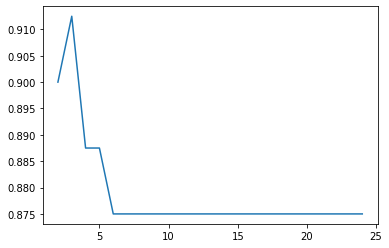

In [308]:
a=[]
for i in range (2,25):

    clf = neighbors.KNeighborsClassifier(i) 
    clf.fit(x_train, y_train)
    a.append( clf.score(x_train, y_train))

print("best k",a.index(max(a))+2)
pyplot.plot(range(2,25),np.array(a))

clf = neighbors.KNeighborsClassifier(a.index(max(a))+2) 
clf.fit(x_train, y_train)
accuracy=clf.score(x_test, y_test)
accuracy

In [309]:
prediction = clf.predict(x_test)
#show the accuracy for train data
z=[]
for i in range (len(x_test)):
    x_test[i]
    if clf.predict([x_test[i]])==y_test[i]:
        z.append(1)
    else:
        z.append(0)
print(z)
#in this run 2 of 20 data are 0 which makes the  accuracy 0.9

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


# svm

in svm we take data to a higher dimention and then separate them

in the code, we fit train data in the model and then calculate the accuracy of test data

In [310]:
clf = svm.SVC()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.9


# kmeans
in kmeans first we chose the best k between 1 to 11 then chose k random data to be the center of the cluster and calculate the distance of all data to k centers and assign each data to a center then calculate the mean of each cluster and make it the new center and keep doing till no changes happen in centers 

in the code, we fit data to the model and add a new column that shows the cluster of the data, and drop the diagnosis because the method is unsupervised and does not suppose to have results 

The best k for this data is 3 because we have a bending point

In [311]:
kmeansdf=df.drop(['diagnosis'],axis=1)
kmeans=KMeans(n_clusters=3)
cluster=kmeans.fit_predict(kmeansdf)
kmeansdf.insert(kmeansdf.columns.get_loc('season'),"cluser",cluster)
kmeansdf.head(20)
y_per=kmeans.predict(x_test)
silhouette_score(x_test,y_per)

c:\Users\Harir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.2208381688512052

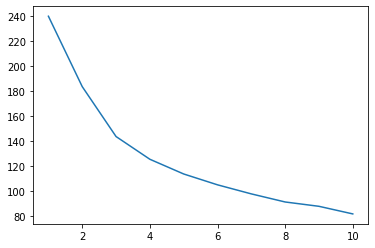

In [312]:
kmeans_kwargs={"init":"random","n_init":10,"random_state":1}
sse=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
plt.pyplot.plot(range(1,11),sse)


we have elbow at k=3